<a href="https://colab.research.google.com/github/NeriNewton/TareasCienciaDeDatos/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección nueva

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
data= pd.read_csv('sent.csv', encoding='latin', header=None)

data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
data.columns = ['sentimiento', 'id', 'fecha', 'entrada', 'usuario', 'texto']

data = data.drop(['id', 'fecha', 'entrada', 'usuario'], axis=1)

data.head()

,sentimiento,texto
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [16]:
print(data['sentimiento'].unique())
sentimiento_series = pd.Series(data['sentimiento'])
print(sentimiento_series.value_counts())

[0 4]
0    800000
4    800000
Name: sentimiento, dtype: int64


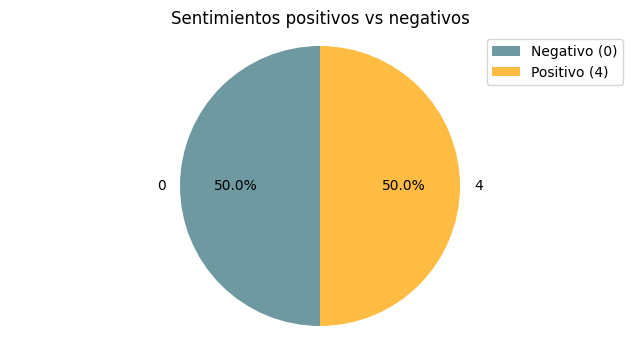

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each value
value_counts = sentimiento_series.value_counts()

# Define the colors for the pie chart wedges
colors = ['#6E99A1', '#FFBC42']  # Replace with your desired pastel colors

# Plot the pie chart
plt.figure(figsize=(8, 4))
value_counts.plot.pie(colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.ylabel('')
plt.title('Sentimientos positivos vs negativos')
plt.legend(['Negativo (0)', 'Positivo (4)'])

In [18]:
random_rows = data.sample(n=5, random_state=42)

# Format and display the random rows stylishly
for _, row in random_rows.iterrows():
    print(f"Sentiment: {row['sentimiento']}\nText: {row['texto']}\n{'-' * 30}")

Sentiment: 0
Text: @chrishasboobs AHHH I HOPE YOUR OK!!! 
------------------------------
Sentiment: 0
Text: @misstoriblack cool , i have no tweet apps  for my razr 2
------------------------------
Sentiment: 0
Text: @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
------------------------------
Sentiment: 0
Text: School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
------------------------------
Sentiment: 0
Text: upper airways problem 
------------------------------


In [19]:
labels = {0:"Negativo", 4:"Positivo"}
def label_decoder(label):
  return labels[label]
data.sentimiento = data.sentimiento.apply(lambda x: label_decoder(x))

In [20]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [21]:
data.text = data.texto.apply(lambda x: preprocess(x))

<ipython-input-21-8fc0b25a5882>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.text = data.texto.apply(lambda x: preprocess(x))


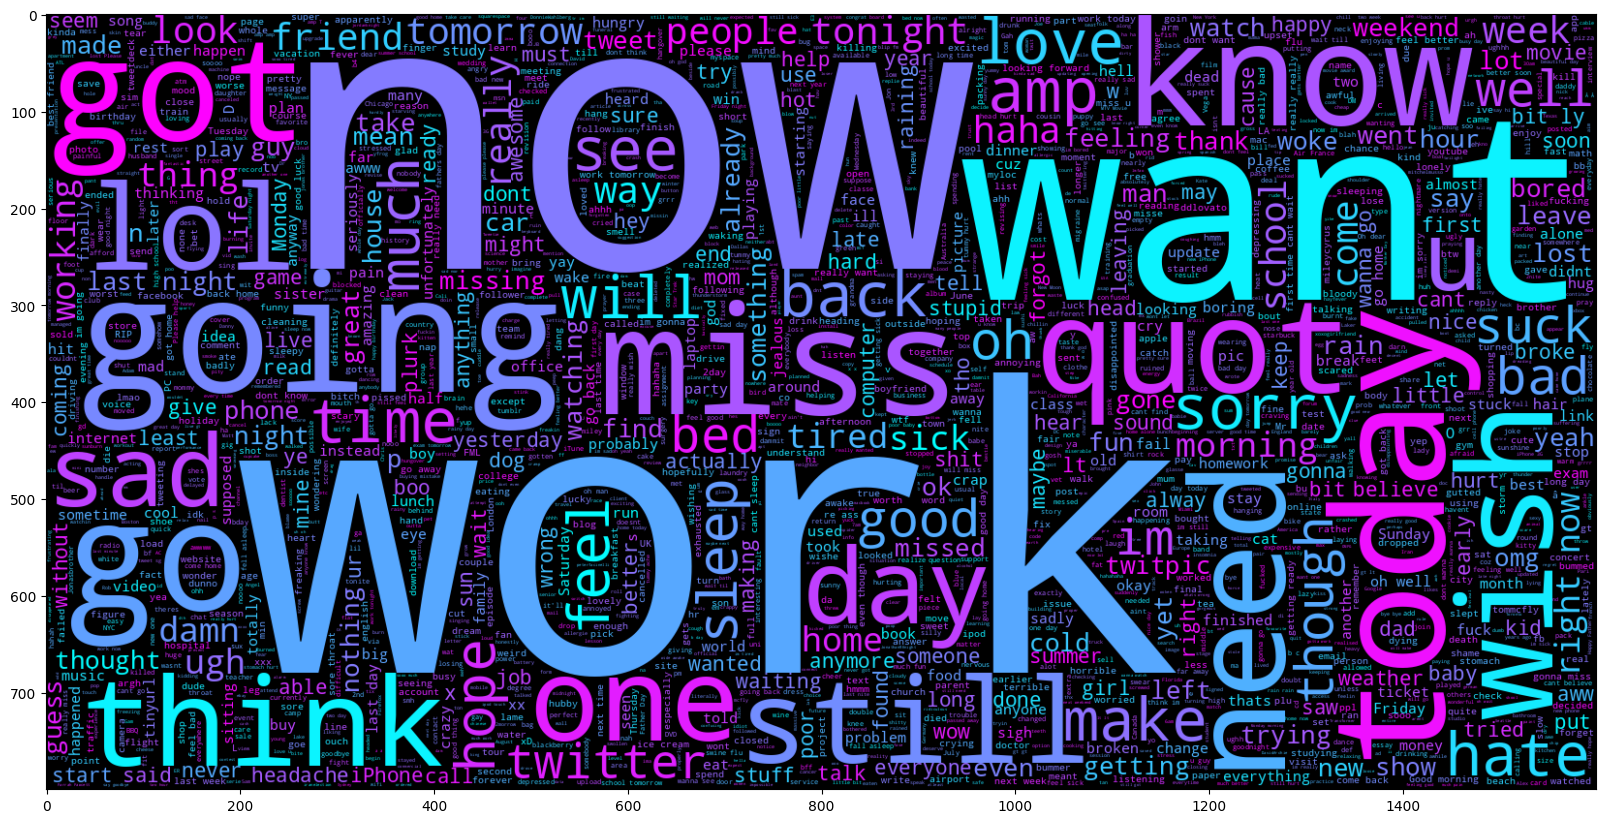

In [22]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800,colormap='cool').generate(" ".join(data[data.sentimiento == 'Negativo'].texto))
plt.imshow(wc , interpolation = 'bilinear')

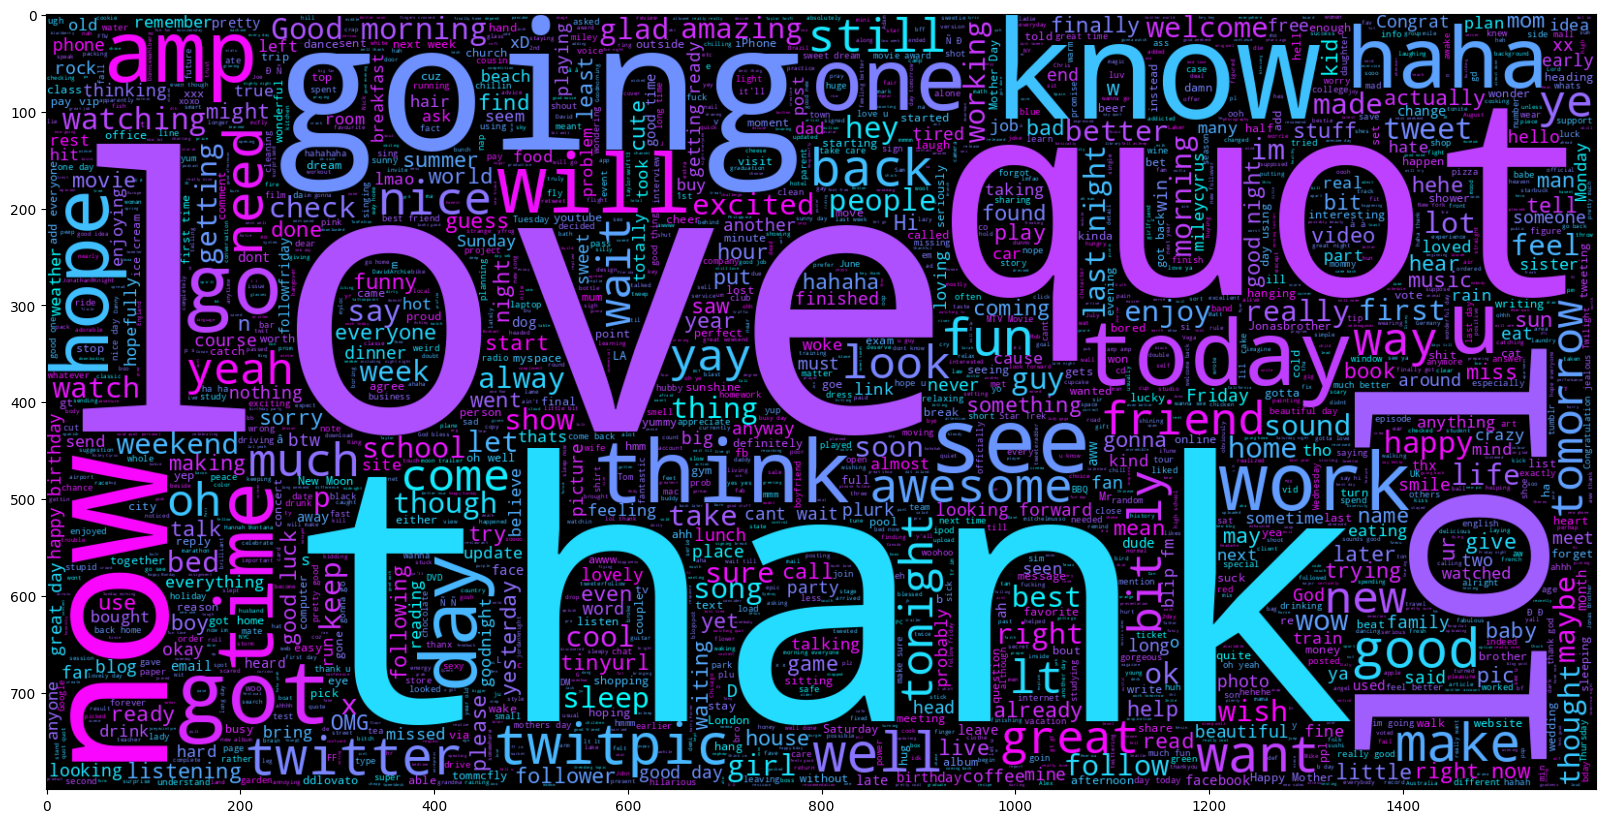

In [23]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800,colormap='cool').generate(" ".join(data[data.sentimiento == 'Positivo'].texto))
plt.imshow(wc , interpolation = 'bilinear')

In [24]:
TRAIN_SIZE = 0.7
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

train_data, test_data = train_test_split(data, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1119999
Test Data size 480001


In [25]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.texto)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 544040


In [26]:
from keras.utils.data_utils import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.texto),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.texto),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1119999, 30)
Testing X Shape: (480001, 30)


In [27]:
labels = train_data.sentimiento.unique().tolist()
encoder = LabelEncoder()
encoder.fit(train_data.sentimiento.to_list())

y_train = encoder.transform(train_data.sentimiento.to_list())
y_test = encoder.transform(test_data.sentimiento.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1119999, 1)
y_test shape: (480001, 1)


In [28]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-06-04 22:40:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-06-04 22:40:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-06-04 22:40:36--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [29]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [30]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [31]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [32]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [33]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [34]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [36]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on CPU...


In [37]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1094/1094 [==============================] - 1428s 1s/step - loss: 0.4934 - accuracy: 0.7581 - val_loss: 0.4458 - val_accuracy: 0.7889 - lr: 0.0010
Epoch 2/10
1094/1094 [==============================] - 1434s 1s/step - loss: 0.4498 - accuracy: 0.7877 - val_loss: 0.4300 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3/10
1094/1094 [==============================] - 1437s 1s/step - loss: 0.4365 - accuracy: 0.7961 - val_loss: 0.4222 - val_accuracy: 0.8042 - lr: 0.0010
Epoch 4/10
1094/1094 [==============================] - 1449s 1s/step - loss: 0.4275 - accuracy: 0.8014 - val_loss: 0.4158 - val_accuracy: 0.8079 - lr: 0.0010
Epoch 5/10
1094/1094 [==============================] - 1482s 1s/step - loss: 0.4216 - accuracy: 0.8048 - val_loss: 0.4120 - val_accuracy: 0.8104 - lr: 0.0010
Epoch 6/10
1094/1094 [==============================] - 1467s 1s/step - loss: 0.4175 - accuracy: 0.8072 - val_loss: 0.4112 - val_accuracy: 0.8116 - lr: 0.0010
Epoch 7/10
1094/1094 [========================

In [75]:
def decode_sentiment(score):
    return "Positivo" if score>0.5 else "Negativo"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

49/49 [==============================] - 121s 2s/step


              precision    recall  f1-score   support

    Negativo       0.81      0.83      0.82    240832
    Positivo       0.83      0.80      0.81    239169

    accuracy                           0.82    480001
   macro avg       0.82      0.82      0.82    480001
weighted avg       0.82      0.82      0.82    480001



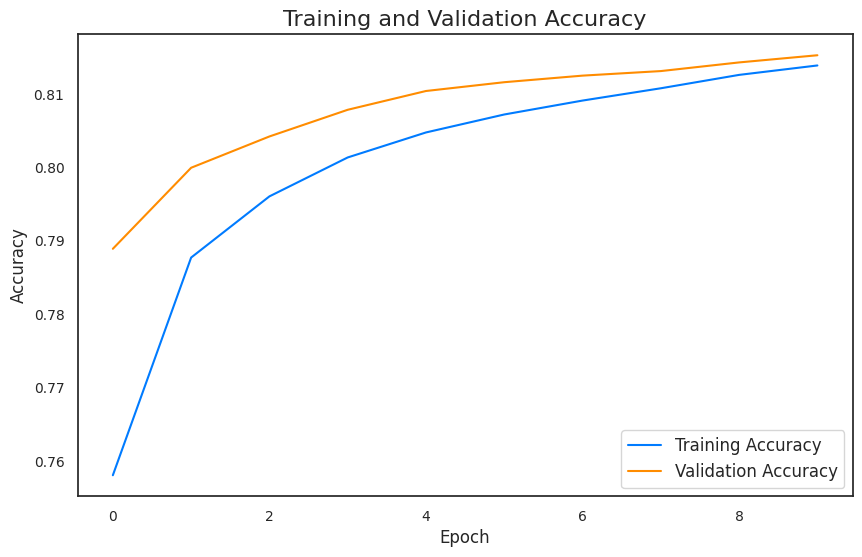

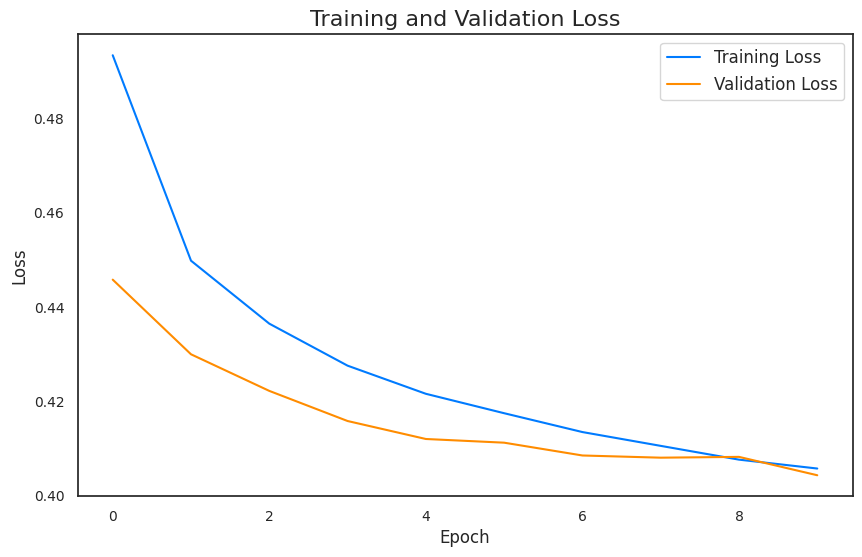

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set(style="white")

# Define contrasting colors
colors = ["#007BFF", "#FF8C00"]

# Get the accuracy and loss values from the history variable
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(accuracy, label='Training Accuracy', color=colors[0])
plt.plot(val_accuracy, label='Validation Accuracy', color=colors[1])
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color=colors[0])
plt.plot(val_loss, label='Validation Loss', color=colors[1])
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

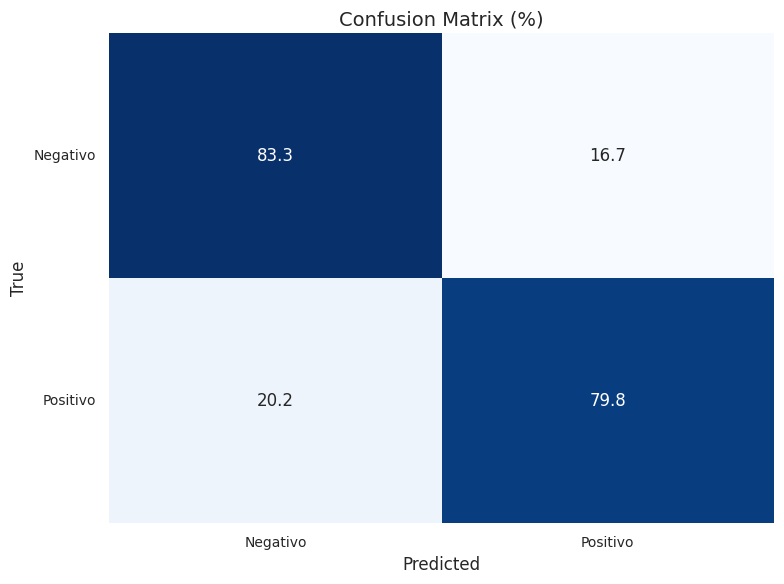

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have predicted labels (y_pred) and true labels (y_true)

# Compute the confusion matrix
cm = confusion_matrix(test_data.sentimiento.to_list(),y_pred_1d)

# Calculate percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Define class labels
class_labels = ['Negativo', 'Positivo']  # Replace with your actual class labels

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Create a heatmap using seaborn
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', cbar=False, ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('True', fontsize=12)

# Set the x-axis and y-axis ticks and tick labels
ax.set_xticks(np.arange(len(class_labels)) + 0.5)
ax.set_yticks(np.arange(len(class_labels)) + 0.5)
ax.set_xticklabels(class_labels, rotation=0, ha='center', fontsize=10)
ax.set_yticklabels(class_labels, rotation=0, ha='right', fontsize=10)

# Set the title
ax.set_title('Confusion Matrix (%)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [91]:
print(classification_report(list(test_data.sentimiento), y_pred_1d))

              precision    recall  f1-score   support

    Negativo       0.81      0.83      0.82    240832
    Positivo       0.83      0.80      0.81    239169

    accuracy                           0.82    480001
   macro avg       0.82      0.82      0.82    480001
weighted avg       0.82      0.82      0.82    480001

